In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import invgamma,t
from numpy import random, linalg
from scipy.stats import multivariate_normal
from scipy.stats import truncnorm

In [3]:

#Gibbs parameters
samples= 3000
Vt = 5

#s1,s2 -Assembler
s1_list=[]
s2_list=[]

#mean S assembler
s1, s2 = 25, 25
mean_s=np.array([[s1],[s2]])

#dev S assembler
s_covar=np.array([[64,0],[0,64]])

#def A
A=np.array([[1,-1]])

# truncnorm parameters
a=0
b=np.inf

In [4]:
t_var = Vt
s_sample_covar=np.linalg.inv(np.linalg.inv(s_covar)+np.transpose(A)*(1/t_var)*A)
s_sample_covar_test=np.linalg.inv(np.linalg.inv(s_covar)+np.transpose(A) @A*(1/t_var))
print(f'are they equal? {np.array_equal(s_sample_covar,s_sample_covar_test)}')



are they equal? True


In [5]:
#Gibbs sampling
for i in range(samples):

    #p(t>0|s1,s2)
    mean_t = s1-s2
    t=truncnorm.rvs((a-mean_t)/np.sqrt(t_var),(b-mean_t)/np.sqrt(t_var),loc=mean_t,scale=np.sqrt(t_var),size=1)
    
    # #p(s1,s2|t>0)
    sample_mean_s = s_sample_covar@(np.linalg.inv(s_covar)@mean_s+np.transpose(A)*(1/t_var)*t)

    # sample s1 and s2 from multivariate normal
    s1, s2 = np.random.multivariate_normal(sample_mean_s.flatten(), s_sample_covar, 1).T
    
    s1_list.append(float(s1))
    s2_list.append(float(s2))

In [6]:
# Results
burn_in = 500

print(f'length of s1_list: {len(s1_list)}')
print(f'length of s2_list: {len(s2_list)}')

s1_burned_list = s1_list[burn_in:]
s2_burned_list = s2_list[burn_in:]
print(f'\nlength of s1_list after burn in: {len(s1_burned_list)}')
print(f'\nlength of s2_list after burn in: {len(s2_burned_list)}')

s1_mean = np.mean(s1_list)
s2_mean = np.mean(s2_list)
print(f'\nmean of s1: {s1_mean}')
print(f'mean of s2: {s2_mean}')

s1_burned_mean = np.mean(s1_burned_list)
s2_burned_mean = np.mean(s2_burned_list)
print(f'\nmean of s1 after burn in: {s1_burned_mean}')
print(f'mean of s2 after burn in: {s2_burned_mean}')

s1_var = np.var(s1_list)
s2_var = np.var(s2_list)
print(f'\nvariance of s1: {s1_var}')
print(f'variance of s2: {s2_var}')

s1_burned_var = np.var(s1_burned_list)
s2_burned_var = np.var(s2_burned_list)
print(f'\nvariance of s1 after burn in: {s1_burned_var}')
print(f'variance of s2 after burn in: {s2_burned_var}')

length of s1_list: 3000
length of s2_list: 3000

length of s1_list after burn in: 2500

length of s2_list after burn in: 2500

mean of s1: 29.608104006380454
mean of s2: 20.689126890442505

mean of s1 after burn in: 29.8419525996562
mean of s2 after burn in: 20.59361966280116

variance of s1: 43.3106855197579
variance of s2: 44.97585010922263

variance of s1 after burn in: 43.977228892562785
variance of s2 after burn in: 46.621694617611865


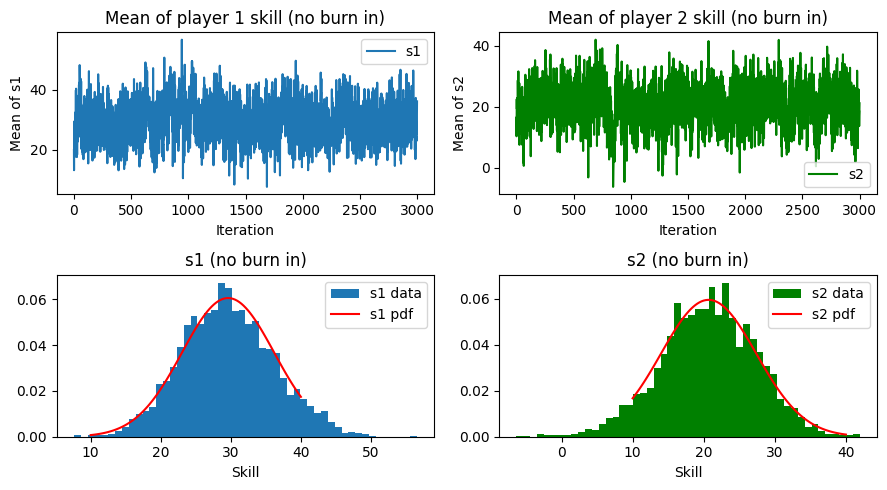

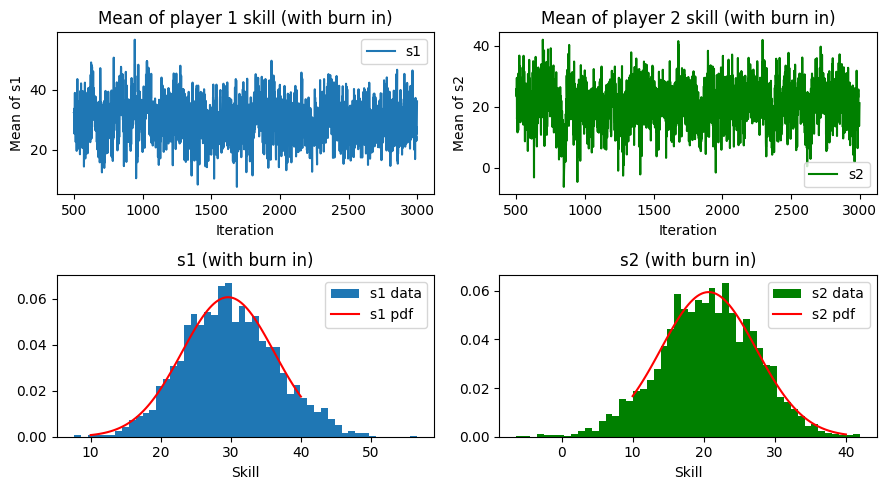

In [12]:
# Plotting
from scipy import stats

for i in range(2):

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))
    
    burn = 0 if i==0 else burn_in
    burn_title = '(no burn in)' if i==0 else '(with burn in)'

    # Player 1
    # Plot the mean of s1 (skill of player 1)
    axes[0, 0].plot(range(burn, samples), s1_list[burn:], label='s1') 
    axes[0, 0].set_title(f'Mean of player 1 skill {burn_title}')
    axes[0, 0].set_xlabel('Iteration')
    axes[0, 0].set_ylabel('Mean of s1')


    # Player 2
    # Plot the mean of s2 (skill of player 2)
    axes[0, 1].plot(range(burn, samples), s2_list[burn:], label='s2', color='g') 
    axes[0, 1].set_title(f'Mean of player 2 skill {burn_title}')
    axes[0, 1].set_xlabel('Iteration')
    axes[0, 1].set_ylabel('Mean of s2')


    # Create pdf for player s1 and player s2
    x_span = np.linspace(10, 40, 100) 
    
    axes[1, 0].hist(s1_list[burn:], bins=50, density=True, label=f's1 data')
    axes[1, 0].plot(x_span, stats.norm.pdf(x_span, s1_mean, np.sqrt(s1_var)), 'r', label=f's1 pdf')
    axes[1, 0].set_title(f's1 {burn_title}')
    axes[1, 0].set_xlabel('Skill')

    axes[1, 1].hist(s2_list[burn:], bins=50, density=True, color='g', label=f's2 data')
    axes[1, 1].plot(x_span, stats.norm.pdf(x_span, s2_mean, np.sqrt(s2_var)), 'r', label=f's2 pdf')
    axes[1, 1].set_title(f's2 {burn_title}')
    axes[1, 1].set_xlabel('Skill')

    for ax in axes.ravel():
        ax.legend()
    

    plt.tight_layout()
    plt.show()

# # Plot prior p(s1) and p(s2) to compare with the posterior
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 3))
# x_span = np.linspace(10, 40, 100)     ############# change this to fit the data

# axes[0].plot(x_span, stats.norm.pdf(x_span, mean_s1[0], np.sqrt(dev_s1[0])), label=f's1 prior') # prior s1
# axes[0].plot(x_span, stats.norm.pdf(x_span, mean_s1[-1], np.sqrt(dev_s1[-1])), 'r', label=f's1 posterior') # posterior s1
# axes[1].plot(x_span, stats.norm.pdf(x_span, mean_s2[0], np.sqrt(dev_s2[0])), 'g', label=f's2 prior') # prior s2
# axes[1].plot(x_span, stats.norm.pdf(x_span, mean_s2[-1], np.sqrt(dev_s2[-1])), 'r', label=f's2 posterior') # posterior s2

# axes[0].set_title(f's1 prior')
# axes[1].set_title(f's2 prior')
# axes[0].set_xlabel('Skill')
# axes[1].set_xlabel('Skill')
# for ax in axes.ravel():
#         ax.legend()
# plt.tight_layout()
# plt.show()

